In [3]:
import os
import sys

import keras.backend as K
from keras.models import Model
from keras.models import load_model
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import plot_loss_and_metric, feature_extraction

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

In [11]:
# Set up path to directories
base_dir = "../cats_and_dogs_small/"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "validation")

In [13]:
#############################CNN with no data augmentation###################
# Set up image data generator
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
train_gen = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              batch_size=20,
                                              class_mode="binary")
valid_gen = valid_datagen.flow_from_directory(directory=valid_dir,
                                              target_size=(224, 224),
                                              batch_size=20,
                                              class_mode="binary")

## Simple CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu",
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# print summary of model
model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
__________________________________________________________

Epoch 1/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6913 - acc: 0.5355 - val_loss: 0.6762 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6645 - acc: 0.6085 - val_loss: 0.6572 - val_acc: 0.6090
Epoch 3/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6227 - acc: 0.6595 - val_loss: 0.6677 - val_acc: 0.5960
Epoch 4/30
100/100 [==============================] - 16s 156ms/step - loss: 0.5757 - acc: 0.6990 - val_loss: 0.6084 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 16s 157ms/step - loss: 0.5453 - acc: 0.7275 - val_loss: 0.5847 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 16s 157ms/step - loss: 0.5170 - acc: 0.7360 - val_loss: 0.5813 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 16s 157ms/step - loss: 0.4892 - acc: 0.7535 - val_loss: 0.5899 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 1

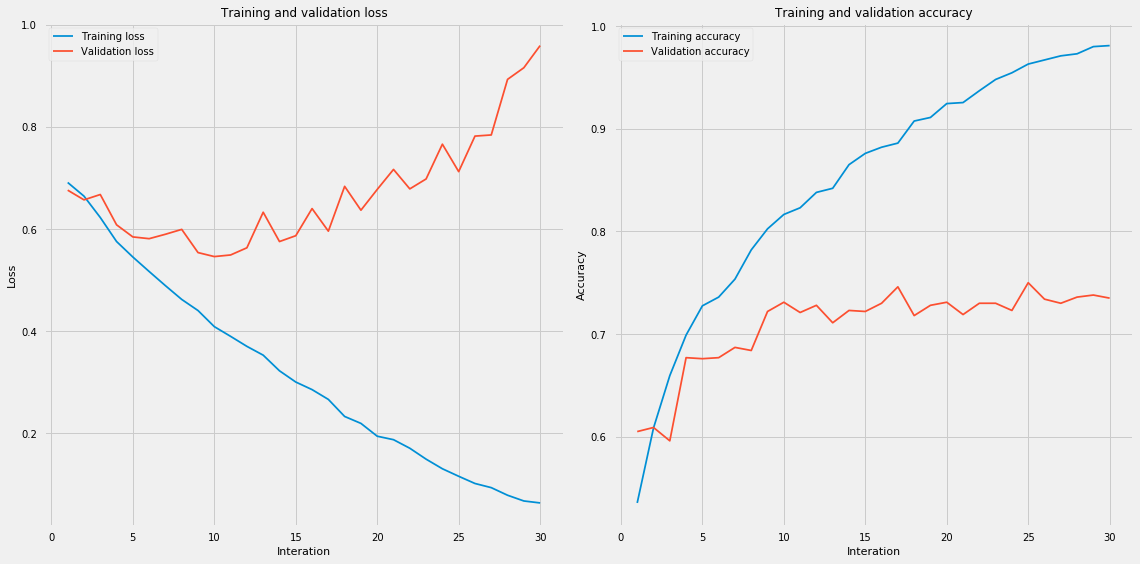

In [13]:
# Compile the model
model.compile(optimizer=optimizers.rmsprop(lr=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Run the model
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=valid_gen,
                              validation_steps=50)
# Save the model
model.save("cats_and_dogs_small_no_data_aug.h5")

# Plot the metrics and losses
plot_loss_and_metric(history)

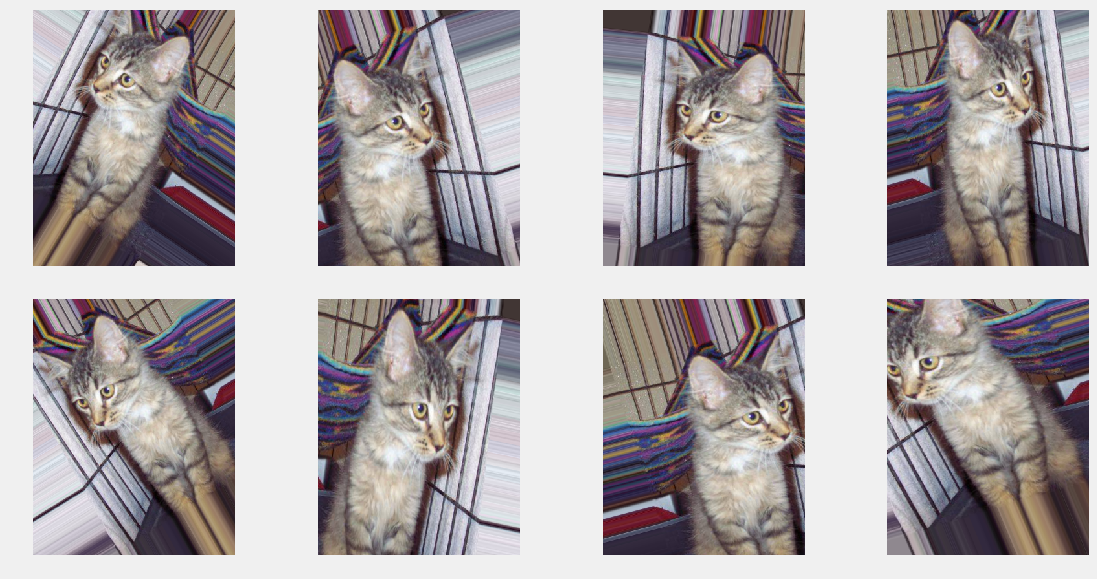

In [21]:
# Sample of how data augmentation change images
data_gen = ImageDataGenerator(rescale=1/255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              horizontal_flip=True,
                              zoom_range=0.2)
img_path = os.path.join(train_dir, "cats/cat.2.jpg")
img = image.load_img(img_path)
img = image.img_to_array(img)
img = img.reshape((1,) + img.shape)
i = 0
plt.figure(figsize=(16, 16))
for batch in data_gen.flow(img, batch_size=1):
    plt.subplot(440 + (i + 1))
    plt.imshow(batch[0])
    plt.axis("off")
    i += 1
    if i == 8:
        break;
plt.tight_layout()

In [22]:
#############################CNN with data augmentation###################
# Set up image data generator with data augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2)
valid_datagen = ImageDataGenerator(rescale=1/255)
train_gen = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(150, 150),
                                              batch_size=20,
                                              class_mode="binary")
valid_gen = valid_datagen.flow_from_directory(directory=valid_dir,
                                              target_size=(150, 150),
                                              batch_size=20,
                                              class_mode="binary")

## CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu",
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
# print summary of model
model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
__________________________________________________________

In [23]:
# Compile the model
model.compile(optimizer=optimizers.rmsprop(lr=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Run the model
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=valid_gen,
                              validation_steps=50)
# Save the model
model.save("cats_and_dogs_small_data_aug.h5")

Epoch 1/30
100/100 [==============================] - 28s 278ms/step - loss: 0.6932 - acc: 0.5100 - val_loss: 0.6805 - val_acc: 0.5890
Epoch 2/30
100/100 [==============================] - 25s 249ms/step - loss: 0.6804 - acc: 0.5490 - val_loss: 0.6929 - val_acc: 0.5470
Epoch 3/30
100/100 [==============================] - 25s 250ms/step - loss: 0.6688 - acc: 0.5815 - val_loss: 0.6607 - val_acc: 0.5770
Epoch 4/30
100/100 [==============================] - 25s 254ms/step - loss: 0.6580 - acc: 0.6105 - val_loss: 0.6394 - val_acc: 0.6370
Epoch 5/30
100/100 [==============================] - 25s 248ms/step - loss: 0.6336 - acc: 0.6305 - val_loss: 0.6320 - val_acc: 0.6170
Epoch 6/30
100/100 [==============================] - 25s 248ms/step - loss: 0.6248 - acc: 0.6560 - val_loss: 0.6125 - val_acc: 0.6590
Epoch 7/30
100/100 [==============================] - 25s 251ms/step - loss: 0.6220 - acc: 0.6425 - val_loss: 0.6138 - val_acc: 0.6610
Epoch 8/30
100/100 [==============================] - 2

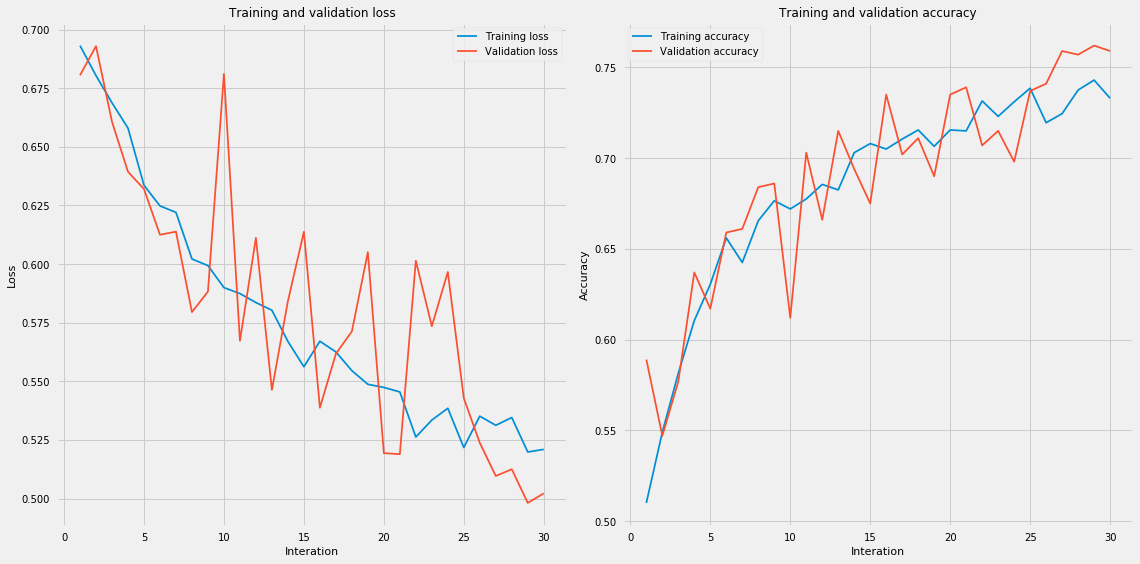

In [24]:
# Plot the metrics and losses
plot_loss_and_metric(history)

In [25]:
#############################pre-trained CNN with no data augmentation###################
# Build classifier utilizing extracted features from pretrained VGG16
conv_base = VGG16(include_top=False,
                  weights="imagenet",
                  input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 5s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool

In [30]:
# Get extracted features
train_features, train_labels = feature_extraction(train_dir,
                                                  conv_base,
                                                  num_examples=2000,
                                                  batch_size=20)
valid_features, valid_labels = feature_extraction(valid_dir,
                                                  conv_base,
                                                  num_examples=1000,
                                                  batch_size=20)

train_features = train_features.reshape((2000, -1))
valid_features = valid_features.reshape((1000, -1))
train_features.shape, valid_features.shape

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


((2000, 8192), (1000, 8192))

In [31]:
# classifier
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim=(4 * 4 * 512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer=optimizers.rmsprop(lr=1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Run the model
history = model.fit(train_features, train_labels,
                    batch_size=20,
                    epochs=30,
                    validation_data=[valid_features, valid_labels])

# No need to save the model because it is just a classifier

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 589us/step - loss: 0.1768 - acc: 0.9440 - val_loss: 0.2439 - val_acc: 0.9030
Epoch 2/30
2000/2000 [==============================] - 1s 358us/step - loss: 0.1726 - acc: 0.9360 - val_loss: 0.2393 - val_acc: 0.9040
Epoch 3/30
2000/2000 [==============================] - 1s 361us/step - loss: 0.1662 - acc: 0.9400 - val_loss: 0.2383 - val_acc: 0.9060
Epoch 4/30
2000/2000 [==============================] - 1s 359us/step - loss: 0.1639 - acc: 0.9405 - val_loss: 0.2377 - val_acc: 0.9040
Epoch 5/30
2000/2000 [==============================] - 1s 355us/step - loss: 0.1595 - acc: 0.9480 - val_loss: 0.2382 - val_acc: 0.9020
Epoch 6/30
2000/2000 [==============================] - 1s 360us/step - loss: 0.1569 - acc: 0.9460 - val_loss: 0.2384 - val_acc: 0.9010
Epoch 7/30
2000/2000 [==============================] - 1s 361us/step - loss: 0.1515 - acc: 0.9495 - val_loss: 0.2381 - val_acc: 0.9020


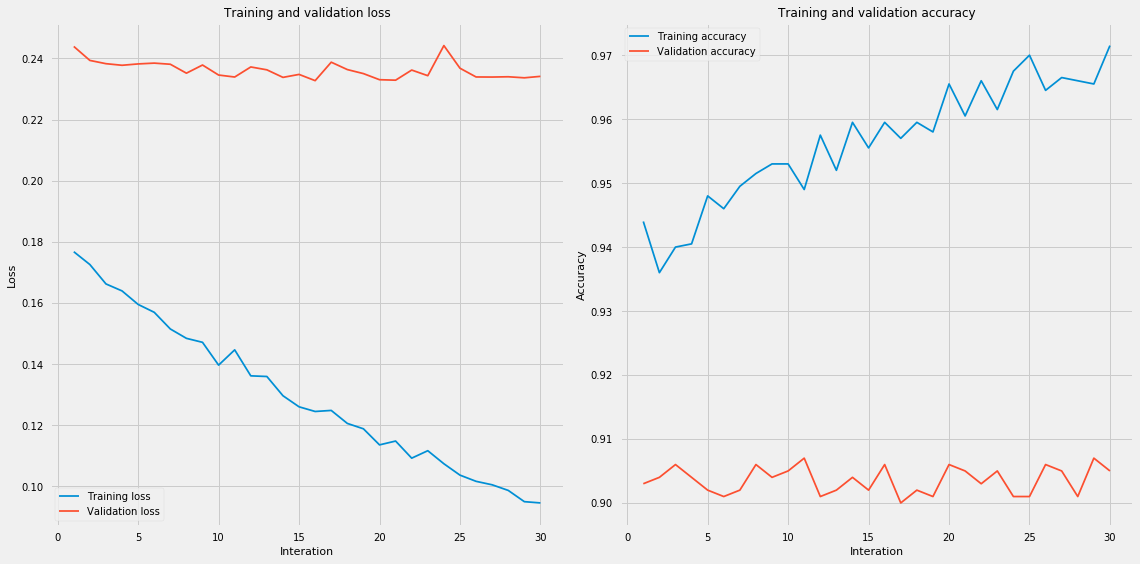

In [35]:
# Plot the metrics and losses
plot_loss_and_metric(history)

In [45]:
#############################pre-trained CNN with data augmentation###################
# Set up image data generator with data augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2)
valid_datagen = ImageDataGenerator(rescale=1/255)
train_gen = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(150, 150),
                                              batch_size=20,
                                              class_mode="binary")
valid_gen = valid_datagen.flow_from_directory(directory=valid_dir,
                                              target_size=(150, 150),
                                              batch_size=20,
                                              class_mode="binary")

# CNN
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

# Freezing conv_base
conv_base.trainable = False

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
# Compile the model
model.compile(optimizer=optimizers.rmsprop(lr=1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Run the model
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=valid_gen,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 286ms/step - loss: 0.6289 - acc: 0.6610 - val_loss: 0.5353 - val_acc: 0.7740
Epoch 2/30
100/100 [==============================] - 26s 261ms/step - loss: 0.5383 - acc: 0.7580 - val_loss: 0.4552 - val_acc: 0.8340
Epoch 3/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4872 - acc: 0.7875 - val_loss: 0.4081 - val_acc: 0.8320
Epoch 4/30
100/100 [==============================] - 26s 265ms/step - loss: 0.4606 - acc: 0.7985 - val_loss: 0.3741 - val_acc: 0.8530
Epoch 5/30
100/100 [==============================] - 26s 265ms/step - loss: 0.4382 - acc: 0.8085 - val_loss: 0.3500 - val_acc: 0.8650
Epoch 6/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4170 - acc: 0.8130 - val_loss: 0.3318 - val_acc: 0.8760
Epoch 7/30
100/100 [==============================] - 26s 262ms/step - loss: 0.3992 - acc: 0.8355 - val_loss: 0.3240 - val_acc: 0.8670
Epoch 8/30
100/100 [==============================] - 2

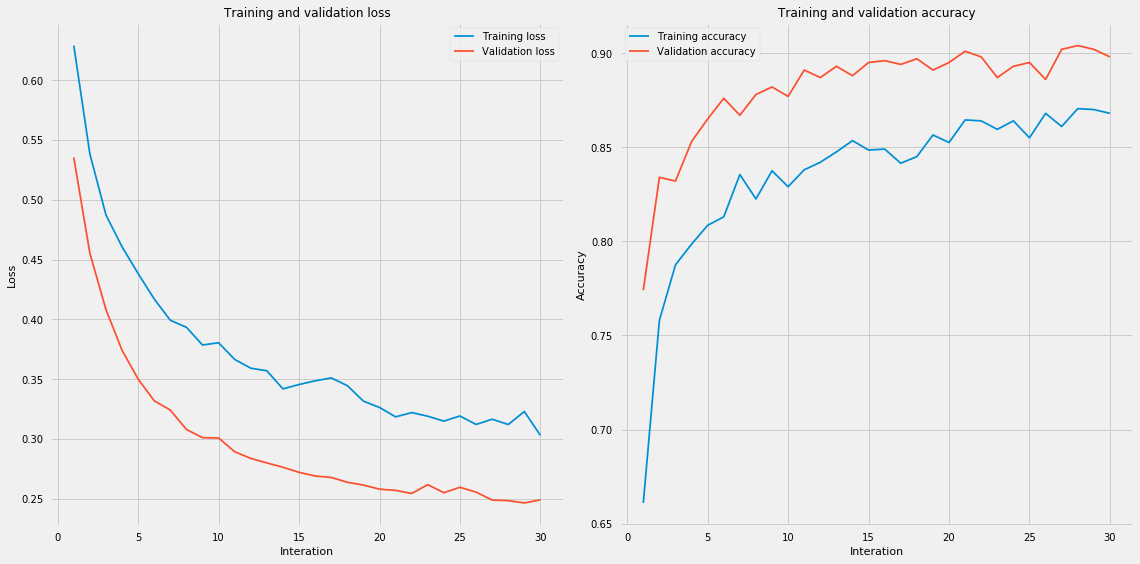

In [41]:
# Plot the metrics and losses
plot_loss_and_metric(history)

In [46]:
#############################fine-tune pre-trained CNN with data augmentation###################
# Fine tune the model by training also the last 3 layers in conv_base
conv_base.trainable = True
# Set only last 3 conv layers to true (note that last layer is a pooling layer)
for layer in conv_base.layers:
    if layer.name in ["block5_conv1", "block5_conv2", "block5_conv3"]:
        layer.trainable = True
    else:
        layer.trainable = False

# Compile the model
model.compile(optimizer=optimizers.rmsprop(lr=1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Run the model
history = model.fit_generator(train_gen,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=valid_gen,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 293ms/step - loss: 0.5299 - acc: 0.7465 - val_loss: 0.3477 - val_acc: 0.8510
Epoch 2/30
100/100 [==============================] - 27s 265ms/step - loss: 0.3631 - acc: 0.8450 - val_loss: 0.2547 - val_acc: 0.8960
Epoch 3/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3084 - acc: 0.8675 - val_loss: 0.2228 - val_acc: 0.9090
Epoch 4/30
100/100 [==============================] - 27s 271ms/step - loss: 0.2952 - acc: 0.8655 - val_loss: 0.2265 - val_acc: 0.9040
Epoch 5/30
100/100 [==============================] - 27s 266ms/step - loss: 0.2598 - acc: 0.8905 - val_loss: 0.2223 - val_acc: 0.9010
Epoch 6/30
100/100 [==============================] - 27s 267ms/step - loss: 0.2662 - acc: 0.8835 - val_loss: 0.2361 - val_acc: 0.8980
Epoch 7/30
100/100 [==============================] - 27s 266ms/step - loss: 0.2307 - acc: 0.9030 - val_loss: 0.1941 - val_acc: 0.9220
Epoch 8/30
100/100 [==============================] - 2

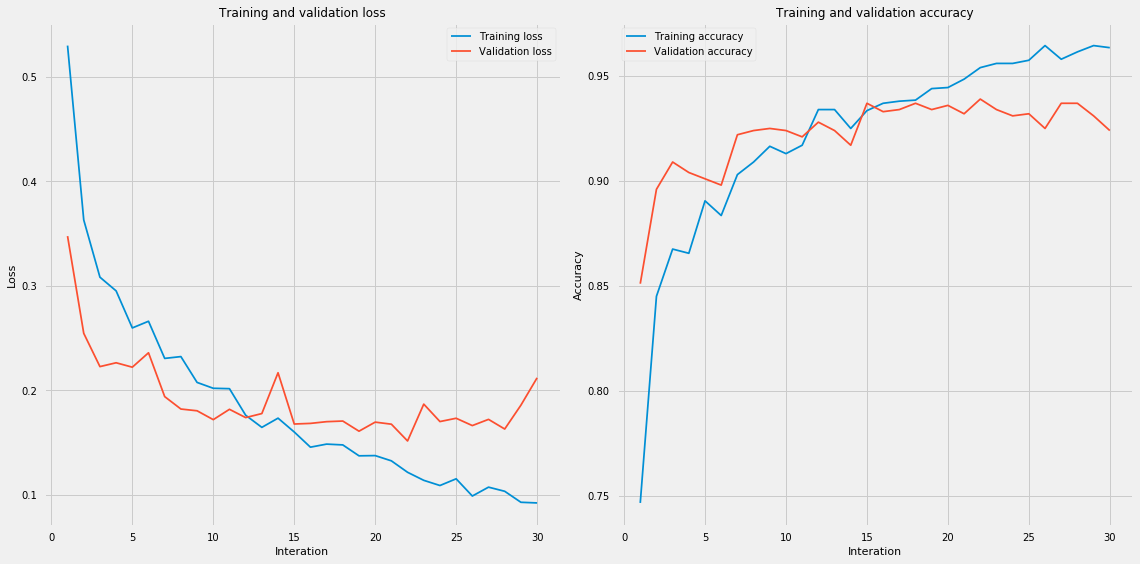

In [47]:
# Plot the metrics and losses
plot_loss_and_metric(history)

In [4]:
# Loading model trained from scratch with data augmentation
model = load_model('cats_and_dogs_small_data_aug.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

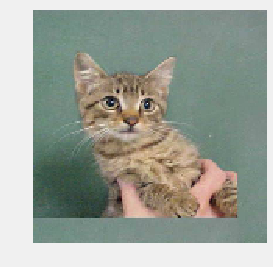

In [23]:
# Get an image the NN was not trained on
dst = "/Users/imad/Documents/keras_book/cats_and_dogs_small/"
img_path = os.path.join(dst, "test/cats/cat.1502.jpg")
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255
plt.imshow(img[0])
plt.axis("off");

In [24]:
# Will get the conv_base of the trained model (not the classifier layers (top layers))
layer_outputs = [layer.output for layer in model.layers[:8]]
# Build model that takes one image as input and out the activations of 8 layers
# i.e. 8 outputs
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)
activations[0].shape, activations[-1].shape

((1, 148, 148, 32), (1, 7, 7, 128))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


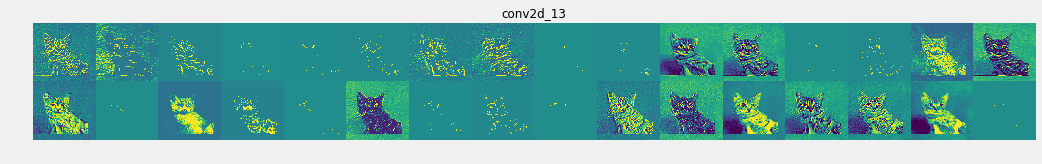

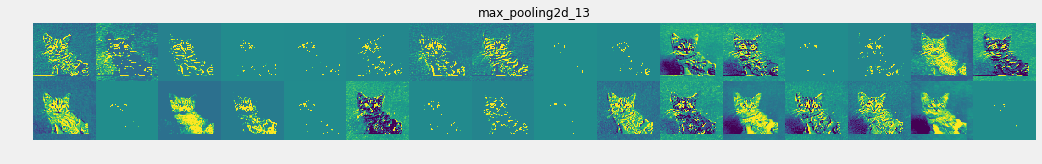

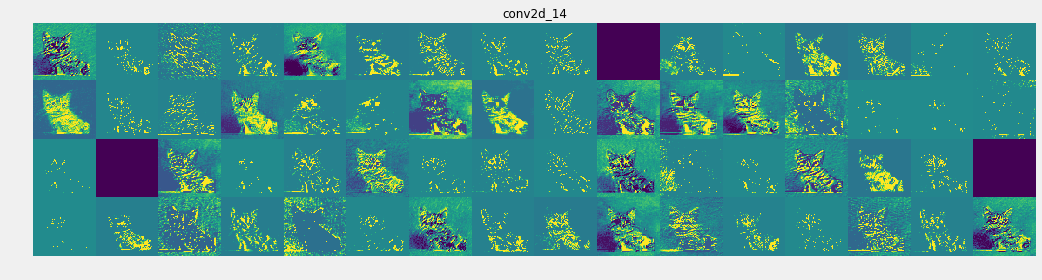

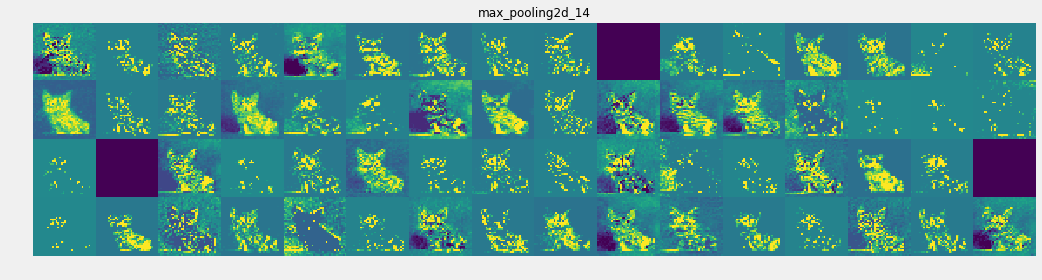

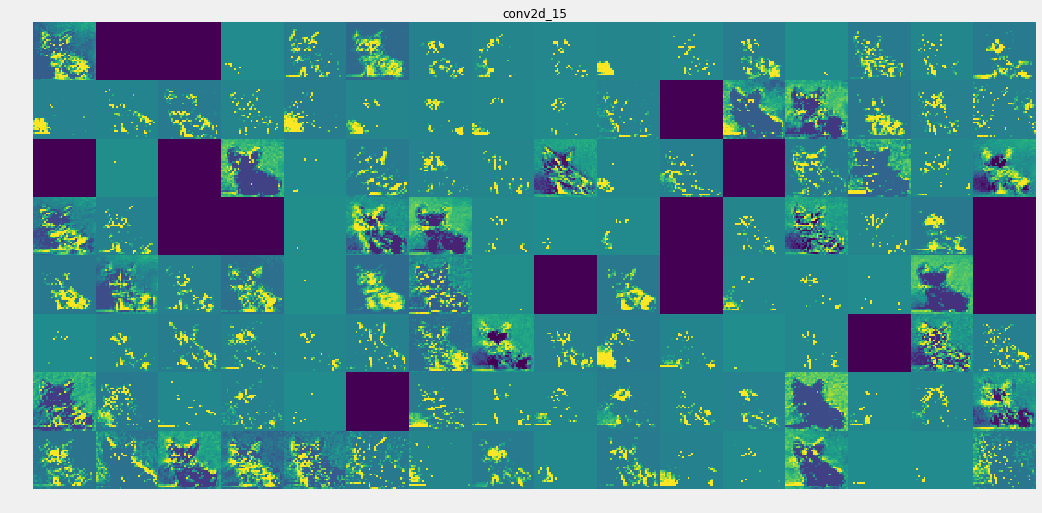

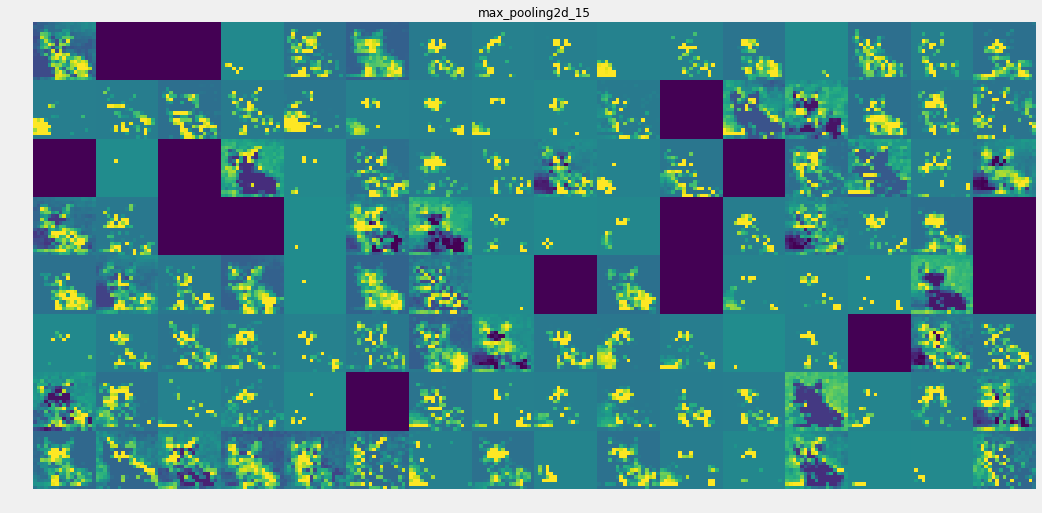

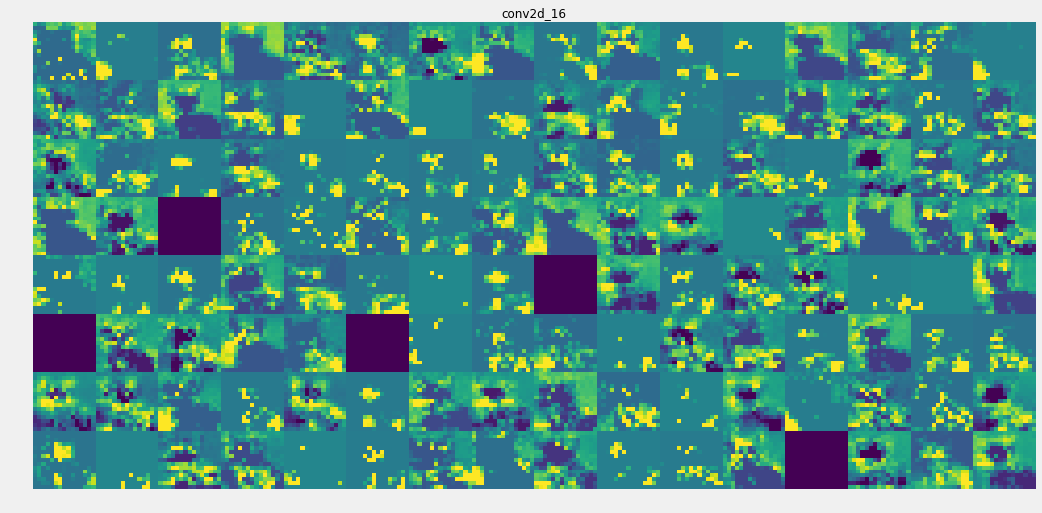

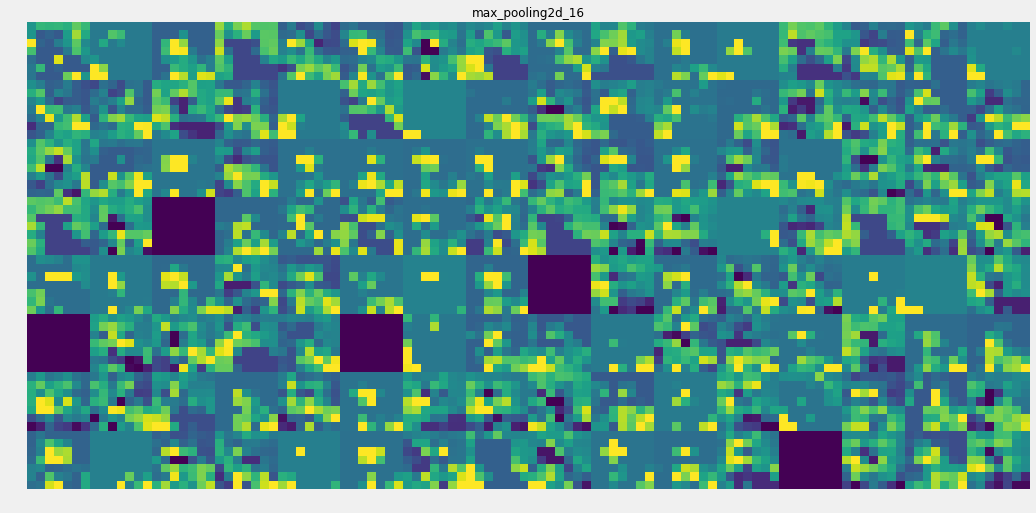

In [25]:
# Get the name of the conv_base layers
layer_names = [layer.name for layer in model.layers[:8]]
# Since the filters are multiple of 16 --> Use 16 images per row
imgs_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    # Get number of features, size, and number of columns (1, size, size, features)
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_col = n_features // imgs_per_row

    # Initialize display grid
    grid = np.zeros((size * n_col, size * imgs_per_row))
    for col in range(n_col):
        for row in range(imgs_per_row):
            channel_img = layer_activation[0, :, :, col * imgs_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_img -= channel_img.mean()
            channel_img /= channel_img.std()
            channel_img *= 64
            channel_img += 128
            channel_img = np.clip(channel_img, 0, 255).astype("uint8")
            grid[col * size:(col + 1) * size, row *
                 size:(row + 1) * size] = channel_img
            
    scale = 1 / size
    plt.figure(figsize=(scale * grid.shape[1], scale * grid.shape[0]))
    plt.axis("off")
    plt.imshow(grid, aspect="auto", cmap="viridis")
    plt.title(layer_name)

In [ ]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_patterns(layer_name, filter_index, size):
    # Get the output of the given layer
    layer_output = model.get_layer(layer_name).output
    # Define loss fn
    loss = K.mean(layer_output[:, :, :, filter_index])
    # Define gradients
    grads = K.gradients(loss, model.input)[0]
    # Normalize gradients
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-4)
    # Compute loss and gradients
    iterate = K.function([model.input], [loss, grads])
    
    # Initialize gray image
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    # Run gradient ascent for 40 steps
    step = 1
    for i in range(50):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
model = VGG16(weights='imagenet',
              include_top=False)
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_patterns(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.axis("off")
    plt.show()